# Análise da Execução Orçamentária mensal em 2015 da cidade de São Paulo

In [221]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Primeiro precisamos baixar todos os arquivos de execução por mês do site da Prefeitura. Para isso o seguinte comando do shell é suficiente:

In [ ]:
!for i in 0{1..9} 10 ; do wget http://orcamento.prefeitura.sp.gov.br/orcamento/uploads/2015/qdd_${i}2015.xls ; done

Feito isso carremos cada um dos arquivos utilizando o Pandas:

In [222]:
dados = []
for mes in range(10):
    dados.append(pd.read_excel('qdd_{:02d}2015.xls'.format(mes + 1)))

E finalmente agrupamos os dados a partir do código de um orgão e somamos o total da coluna Vl_Liquidado:

In [101]:
dg = []
for i in range(10):
    dg.append(dados[i].groupby(['Cd_Orgao'])['Vl_Liquidado'].sum())

Mas estamos interessados apenas nas secretarias, então pra isso vou filtrar todos os códigos de orgãos cujo nome comece com SECRETARIA:

In [194]:
sd = dados[0][dados[0]['Ds_Orgao'].str.startswith('SECRETARIA')][['Cd_Orgao', 'Ds_Orgao']]
secretarias = sd.drop_duplicates()
secretarias_list = secretarias.values.tolist()

E finalmente vamos produzir uma série temporal pra cada secretaria. Pra isso iremos calcular o valor do mês corrente, menos o valor já liquidado do começo do ano até o mês anterior:

In [110]:
sec_time_series = {}
for sec in dg[0].index:
    sec_time_series[sec] = [dg[mes][sec] - dg[mes-1][sec] for mes in range(1,10)]


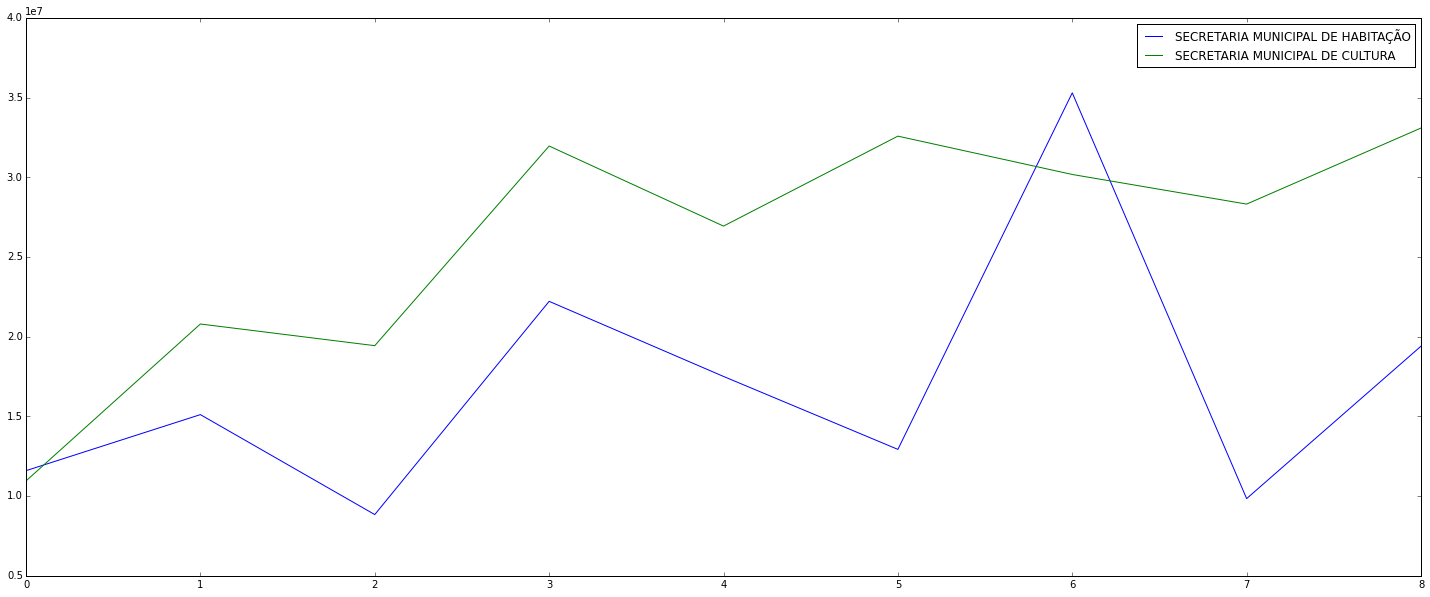

In [220]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set']
plot(sec_time_series[14], label=sec_code(14))
plot(sec_time_series[25], label=sec_code(25))
legend()
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [223]:
def sec_code(code):
    return secretarias[secretarias['Cd_Orgao'] == code]['Ds_Orgao'].values[0]

# Análise da execução da Secretaria Municipal da Habitação

Para essa análise vou utilizar apenas a planilha com o valor total pago no ano. A fonte de dados encontra-se aqui:

http://orcamento.prefeitura.sp.gov.br/orcamento/execucao.html

Após o download do arquivo carregamos ele com o Pandas:

In [246]:
dados = pd.read_excel('basedadosexecucao2015.xls')

Nesta análise estou interaçado apenas na execução de projetos da [Secretaria Municipal de Habitação](http://www.prefeitura.sp.gov.br/cidade/secretarias/habitacao/). Para isso eu filtro os valors da planilha a partir da coluna 'DS_ORGAO':

In [260]:
habitacao = dados[dados['DS_ORGAO'] == u'Secretaria Municipal de Habita\xe7\xe3o']

E filtro novamente somente os projetos cuja porcentagem de valor pago em relação ao valor empenhado está abaixo de 50%:

In [404]:
menos_que_metade = habitacao[habitacao['VL_PAGO']/habitacao['VL_EMPENHADOLIQUIDO'] < 0.5]

In [419]:
print "Total Pago: R$ {:,}".format(menos_que_metade['VL_PAGO'].sum())
print "Total empenhado: R$ {:,}".format(menos_que_metade['VL_EMPENHADOLIQUIDO'].sum())
porcentagem_paga = menos_que_metade['VL_PAGO'].sum()/menos_que_metade['VL_EMPENHADOLIQUIDO'].sum()
print "Porcentagem: {:0.2f}%".format(porcentagem_paga)

Total Pago: R$ 6,624,797.11
Total empenhado: R$ 50,304,500.58
Porcentagem: 0.13%


E agora meu interesse foi verificar o valor total empenhado e pago por projeto atividade:

In [426]:
pa_ordenado = habitacao.groupby('DS_PROJETO_ATIVIDADE')[['VL_EMPENHADOLIQUIDO', 'VL_PAGO']].sum().sort('VL_PAGO', ascending=False)
pa_ordenado

/home/walrus/.virtualenvs/py/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


VL_EMPENHADOLIQUIDO  \
DS_PROJETO_ATIVIDADE                                                      
Verba de Atendimento Habitacional - Aluguel Social         1.147749e+08   
Urbanização de Favelas                                     6.714095e+07   
Administração da Unidade                                   2.568724e+07   
Manutenção de Sistemas de Informação e Comunicação         1.121000e+06   
Execução do Programa de Mananciais                         2.298991e+06   
E3780 - Construção de Empreendimento Habitacion...         0.000000e+00   
Requalificação de Cortiços                                 0.000000e+00   
Construção de Unidades Habitacionais                       0.000000e+00   
Urbanização de Favela Trav. Valdir Doroteia - T...         0.000000e+00   
Urbanização de Favela São Jorge - Rua Professor...         0.000000e+00   
Urbanização de Favela Itapura - Rua Felicio Ros...         0.000000e+00   
Urbanização de Favela Dona Biniba - Rua Josefin...         0.000000e+00   
Urbanização de Favela Canto da Noite - Viela Bo...         0.000000e+00   
Urbanização de Favela Augusto Gonzaga - Rua Dr....         0.000000e+00   
Urbanização de Favela Arrebento - Rua Rodrigues...         0.000000e+00   
Urbanização de Favela Angelo Cristianini, alt. ...         0.000000e+00   
Urbanização da Favela do Moinho                            0.000000e+00   
Urbanização da Favela Zavuvus                              0.000000e+00   
Regularização Fundiária                                    1.553575e+06   
E3786 - Aquisição de Área para Construção de Em...         0.000000e+00   
E2717 - Implantação de Academias de Ginástica p...         0.000000e+00   
Assistência Técnica a Entidades no Âmbito do Pr...         0.000000e+00   
Execução do Programa de Manaciais - Fase 03 - L...         0.000000e+00   
Execução do Programa de Manaciais - Fase 03 - L...         0.000000e+00   
Execução do Programa de Manaciais - Fase 03 - L...         0.000000e+00   
Execução do Programa de Manaciais - Fase 03 - L...         0.000000e+00   
Execução do Programa de Manaciais - Fase 03 - L...         0.000000e+00   
Execução do Programa de Manaciais - Fase 03 - L...         0.000000e+00   
Execução do Programa de Manaciais - Fase 03 - L...         0.000000e+00   
Execução do Programa de Manaciais - Fase 03 - L...         0.000000e+00   
E5450 - Reurbanização do Jardim Três Poderes - ...         0.000000e+00   
E2716 - Implantação de Quadra Poliesportiva no ...         0.000000e+00   

                                                        VL_PAGO  
DS_PROJETO_ATIVIDADE                                             
Verba de Atendimento Habitacional - Aluguel Social  98306590.00  
Urbanização de Favelas                              27091851.42  
Administração da Unidade                            23283884.14  
Manutenção de Sistemas de Informação e Comunicação    653670.28  
Execução do Programa de Mananciais                    229166.63  
E3780 - Construção de Empreendimento Habitacion...         0.00  
Requalificação de Cortiços                                 0.00  
Construção de Unidades Habitacionais                       0.00  
Urbanização de Favela Trav. Valdir Doroteia - T...         0.00  
Urbanização de Favela São Jorge - Rua Professor...         0.00  
Urbanização de Favela Itapura - Rua Felicio Ros...         0.00  
Urbanização de Favela Dona Biniba - Rua Josefin...         0.00  
Urbanização de Favela Canto da Noite - Viela Bo...         0.00  
Urbanização de Favela Augusto Gonzaga - Rua Dr....         0.00  
Urbanização de Favela Arrebento - Rua Rodrigues...         0.00  
Urbanização de Favela Angelo Cristianini, alt. ...         0.00  
Urbanização da Favela do Moinho                            0.00  
Urbanização da Favela Zavuvus                              0.00  
Regularização Fundiária                                    0.00  
E3786 - Aquisição de Área para Construção de Em...         0.00  
E2717 - Implantação de Academias de Ginástica p..

Para visualizar melhor os dados acima vou utilizar a biblioteca Bokeh que gera gráficos interativos no navegador. 


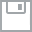
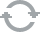
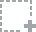
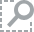
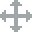
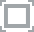
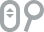
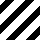
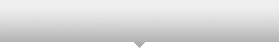
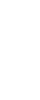
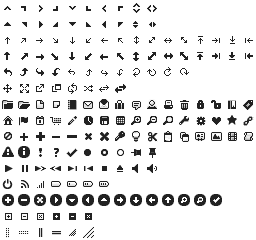
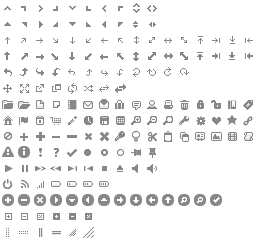
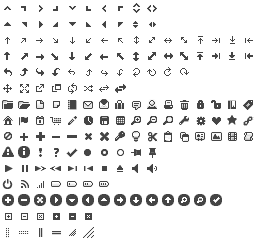
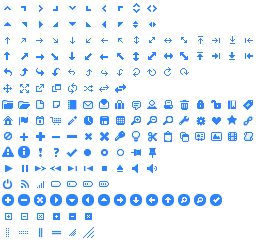
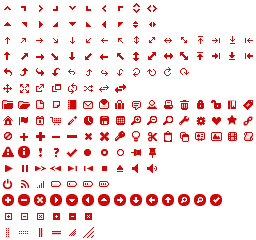
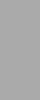
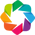
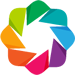

In [434]:
from collections import OrderedDict
import bokeh
from bokeh._legacy_charts import Bar, show
bokeh.io.output_notebook()

Filtro os Projetos Atividade cujo valor empenhado tenha sido maior que zero:

In [427]:
top_pa = pa_ordenado[pa_ordenado['VL_EMPENHADOLIQUIDO'] > 0]
nomes_pas = top_pa.index.tolist()

In [428]:
pago = top_pa.VL_PAGO.astype(float).values
empenhado = top_pa.VL_EMPENHADOLIQUIDO.astype(float).values

In [429]:
desembolso = OrderedDict(pago=pago, empenhado=empenhado)

In [438]:
bar = Bar(desembolso, nomes_pas, title="Projeto Atividades da SEHAB", legend='top_right', width=1400, height=900)
bar.min_border_left = 450


In [439]:
show(bar)

Seria interessante generalizarmos o processo acima para obtermos gráficos da execução dos projeto atividades para diferentes secretarias. Para isso vou criar uma função que receba o código de uma secretaria e gere um gráfico como o acima. Compartimentalizando essa tarefa numa função vai nos permitir também em pensarmos numa aplicação standalone web onde uma pessoa poderá escolher uma das várias secretarias e ver um gráfico como acima. Let start.


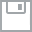
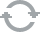
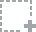
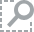
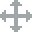
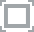
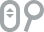
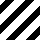
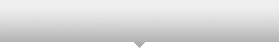
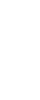
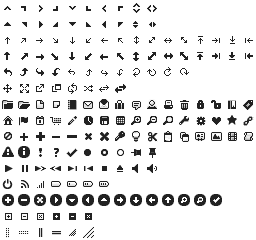
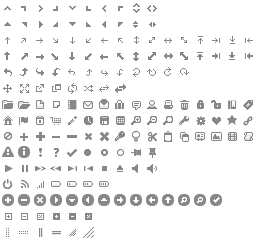
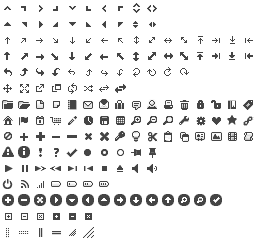
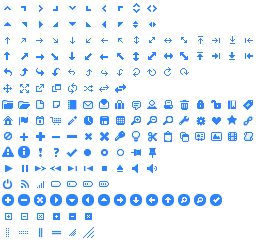
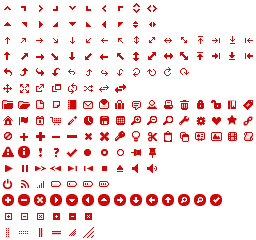
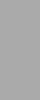
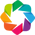
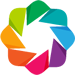

In [501]:
from collections import OrderedDict
import bokeh
from bokeh._legacy_charts import Bar, show
bokeh.io.output_notebook()

def orgao_execucao(orgao_codigo, porcentagem_execucao = 0.5, base_de_dados = None):
    if not base_de_dados:
        dados = pd.read_excel('basedadosexecucao2015.xls')
    else:
        dados = base_de_dados
    
    # Cria funcao pra retornar nome do orgão a partir do código
    orgaos_codigos = dados[['CD_ORGAO', 'DS_ORGAO']].drop_duplicates()
    def nome_orgao(codigo_orgao):
        return orgaos_codigos[orgaos_codigos['CD_ORGAO'] == codigo_orgao]['DS_ORGAO'].values[0]
    
    # Filtra apenas dados de um determinado orgão
    dados_orgao = dados[dados['CD_ORGAO'] == orgao_codigo]
    
    # Filtra novamente agora baseado na porcentagem da execução
    dados_parciais = dados_orgao[dados_orgao['VL_PAGO']/dados_orgao['VL_EMPENHADOLIQUIDO'] < porcentagem_execucao]
    
    # Calcula totalizações
    #print "Total Pago: R$ {:,}".format(dados_parciais['VL_PAGO'].sum())
    #print "Total empenhado: R$ {:,}".format(dados_parciais['VL_EMPENHADOLIQUIDO'].sum())
    #porcentagem_paga = dados_parciais['VL_PAGO'].sum()/dados_parciais['VL_EMPENHADOLIQUIDO'].sum()
    #print "Porcentagem: {:0.2f}%".format(porcentagem_paga)
    
    # Agrupo por Projeto Atividade
    dados_ordenado = dados_parciais.groupby('DS_PROJETO_ATIVIDADE')[['VL_EMPENHADOLIQUIDO', 'VL_PAGO']].sum().sort('VL_PAGO', ascending=False)

    # Filtra Projetos Atividades cujo empenhado seja maior que 0
    maiores_pa = dados_ordenado[dados_ordenado['VL_EMPENHADOLIQUIDO'] > 0]
    nomes_pas = maiores_pa.index.tolist()
    
    pago = maiores_pa.VL_PAGO.astype(float).values
    empenhado = maiores_pa.VL_EMPENHADOLIQUIDO.astype(float).values
    desembolso = OrderedDict(pago=pago, empenhado=empenhado)
    
    bar = Bar(desembolso, nomes_pas, title=u"Projeto Atividades: {}".format(nome_orgao(orgao_codigo)), legend='top_right', width=1400, height=900)
    bar.min_border_left = 450
    show(bar)

Testando com outro orgao:

In [472]:
orgao_execucao(34)

Total Pago: R$ 642,667.11
Total empenhado: R$ 4,255,411.4
Porcentagem: 0.15%


/home/walrus/.virtualenvs/py/lib/python2.7/site-packages/IPython/kernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [485]:
orgaos_codigos = dados[['CD_ORGAO', 'DS_ORGAO']].drop_duplicates()

# Vamos agrupar os orgão em Secretarias, Subprefeituras, Fundos e Outros.

grupos = {'Secretarias': 'Secretaria', 'Subprefeituras': 'Subpref', 'Fundos': 'Fundo'}

orgaos_grupos = {}

for nome_grupo, orgao_filtro in grupos.items():
    orgaos_grupos[nome_grupo] = orgaos_codigos[orgaos_codigos['DS_ORGAO'].str.startswith(orgao_filtro)]

orgaos_grupos['Outros'] = orgaos_codigos[(~orgaos_codigos['DS_ORGAO'].str.startswith('Secretaria')) & 
                                         (~orgaos_codigos['DS_ORGAO'].str.startswith('Subpref')) & 
                                         (~orgaos_codigos['DS_ORGAO'].str.startswith('Fundo'))]


len(orgaos_codigos[orgaos_codigos['DS_ORGAO'].str.startswith('Fundo')])

17

In [497]:
from bokeh import plotting

In [499]:
plotting.reset_output()

In [ ]:
for grupo, codigos in orgaos_grupos.items():
    for orgao_codigo,_ in codigos.values:
        output_file('orgao-{}.html'.format(orgao_codigo))
        orgao_execucao(orgao_codigo)